In [2]:
%matplotlib inline
PATH = '/Users/gaetanoantonicchio/Documents/GitHub/DataMining-2'
sys.path.insert(0, PATH)
import sys

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.insert(1, './fma_metadata/')
from fma_metadata import utils
import warnings
warnings.filterwarnings('ignore')

In [2]:
# extract labels for genres
tracks = utils.load('/Users/gaetanoantonicchio/Desktop/dataset_DM2/fma_metadata/tracks.csv')
genres_labels = tracks['track'][['genre_top']]
genres_labels.dropna(inplace=True)
#genres_labels.head()
# exporting labels: song_popularity
'''with open("genre_labels.csv","w") as new_label:
    new_label.write(genres_labels.to_csv(index=True))'''

'with open("genre_labels.csv","w") as new_label:\n    new_label.write(genres_labels.to_csv(index=True))'

In [3]:
# extract labels for song popularity
echonest = utils.load('/Users/gaetanoantonicchio/Desktop/dataset_DM2/fma_metadata/echonest.csv')
social_features_dataset= echonest['echonest','social_features']
social_features_dataset['song_popularity'] = np.where( ( (social_features_dataset['song_hotttnesss'] >= 0.15)\
                                                         & (social_features_dataset['artist_hotttnesss'] >= 0.4 ) ),
                                                       'popular', 'not popular')

song_popularity_labels = social_features_dataset[['song_popularity']]
#song_popularity_labels.head()
# exporting labels: song_popularity
'''with open("song_popularity_labels.csv","w") as new_label:
    new_label.write(song_popularity_labels.to_csv(index=True))'''

'with open("song_popularity_labels.csv","w") as new_label:\n    new_label.write(song_popularity_labels.to_csv(index=True))'

In [4]:
# extract dataset_song_popularity.csv
dataset_song_popularity = echonest['echonest','audio_features'].merge(tracks['track'][['listens','bit_rate']], on='track_id')

'''with open("dataset_song_popularity.csv","w") as new_label:
    new_label.write(dataset_song_popularity.to_csv(index=True))'''

'with open("dataset_song_popularity.csv","w") as new_label:\n    new_label.write(dataset_song_popularity.to_csv(index=True))'

In [5]:
# extract labels for years_of_rock

rock_genre = tracks['track'][['genre_top']][tracks['track']['genre_top'] == 'Hip-Hop']
# filtered echonest_audio_features by rock genres
rock_df = echonest['echonest','audio_features'].merge(rock_genre,on='track_id')

In [6]:
rock_df.shape

(910, 9)

In [7]:
tracks['artist'].columns

Index(['active_year_begin', 'active_year_end', 'associated_labels', 'bio',
       'comments', 'date_created', 'favorites', 'id', 'latitude', 'location',
       'longitude', 'members', 'name', 'related_projects', 'tags', 'website',
       'wikipedia_page'],
      dtype='object')

In [14]:
# extract year from date_created --> to new col: year_created in track
rock_df = echonest['echonest','audio_features'].merge(tracks['track'][['genre_top','listens','duration','bit_rate','comments']],on='track_id')
rock_df['bit_rate'] = rock_df['bit_rate']//1000

rock_df = rock_df[rock_df['genre_top'] == 'Rock']

tracks['track','year'] = pd.DatetimeIndex(tracks['track','date_created']).year
years = tracks['track'][['year']]
rock_df = rock_df.merge(years, on='track_id')
rock_df = rock_df.merge(echonest['echonest','social_features'][['song_hotttnesss','artist_hotttnesss','artist_familiarity']], on ='track_id')
rock_df = rock_df.merge(tracks['artist'][['name']],on='track_id')


with open("rock_year_df.csv","w") as new_label:
    new_label.write(rock_df.to_csv(index=True))

In [15]:
# extract dataset for classification using echonest dataset
echonest_feat = echonest['echonest','audio_features'].merge(tracks['track'][['genre_top','listens','duration','bit_rate','comments']],on='track_id')

# bit_rate is bit_rate(kbit/s) convert it to seconds (dividing by 1000)
echonest_feat['bit_rate'] = echonest_feat['bit_rate']//1000
echonest_feat.head()

with open("echo_features.csv","w") as new_label:
    new_label.write(echonest_feat.to_csv(index=True))

In [3]:
echo = utils.load('/Users/gaetanoantonicchio/Desktop/dataset_DM2/fma_metadata/echonest.csv')

In [5]:
echo=echo['echonest','audio_features']

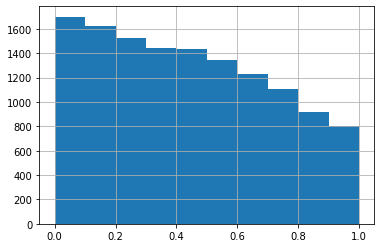

In [7]:
echo['valence'].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb4c7f1ee50>]],
      dtype=object)

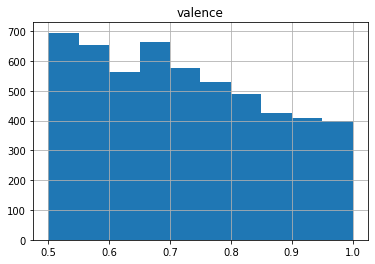

In [11]:
echo[['valence']][echo['valence']>0.5].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb4c79550d0>]],
      dtype=object)

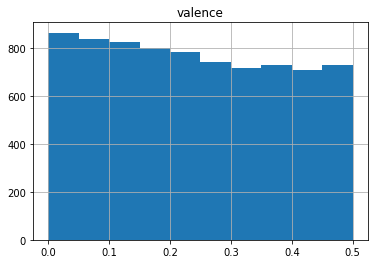

In [12]:
echo[['valence']][echo['valence']<=0.5].hist()

In [ ]:
song_happiness = echo[['valence']].apply(lambda x: 'sad' if x )